<a href="https://colab.research.google.com/github/rutuser/03MAIR----Algoritmos-de-Optimizacion/blob/main/AlgoritmosAG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 2
Nombre: Michal Ruzicka <br>
Link: https://colab.research.google.com/drive/1ujUwIOq9jHVPYTrR-spcT8JDnQZhQoRC?usp=sharing <br>
Github: https://github.com/rutuser/03MAIR----Algoritmos-de-Optimizacion



## Viaje por el rio

In [ ]:
from math import inf

In [ ]:
TARIFAS = [
[0,5,4,3,inf,inf,inf],   #desde nodo 0
[inf,0,inf,2,3,inf,11],  #desde nodo 1
[inf,inf, 0,1,inf,4,10], #desde nodo 2
[inf,inf,inf, 0,5,6,9],
[inf,inf, inf,inf,0,inf,4],
[inf,inf, inf,inf,inf,0,3],
[inf,inf,inf,inf,inf,inf,0]
]

In [ ]:
def Precios(TARIFAS):
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [inf]*N for i in [inf]*N]  #n x n 
  RUTA = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,0,2,5'

## Ramificación y poda

In [ ]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR
  
valor((0, 1, 2, 3  ),COSTES)

73

In [ ]:
from itertools import permutations

def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(permutations(range(len(COSTES)))):
    valor_tpm = valor(s,COSTES)
    if valor_tpm < mejor_valor:
      mejor_valor = valor_tpm
      mejor_solucion = s

  print("La mejor solucion es ", mejor_solucion, " con valor ", mejor_valor)

fuerza_bruta(COSTES)

La mejor solucion es  (0, 3, 1, 2)  con valor  61


In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),COSTES)

74

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))

  cota_sup = valor(MEJOR_SOLUCION, COSTES)

  nodos = []
  nodos.append({'s': (), 'ci': CI((), COSTES)})

  iteracion = 0

  while len(nodos) > 0:
    iteracion += 1

    nodo_prometedor = [min(nodos, key=lambda x: x['ci'])][0]['s']

    # SE GENERAN HIJOS
    hijos = [{'s': x['s'], 'ci': CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

    nodo_final = [x for x in hijos if len(x['s']) == DIMENSION]

    if len(nodo_final) > 0:
      if nodo_final[0]['ci'] < cota_sup:
        cota_sup = nodo_final[0]['ci']
        mejor_solucion = nodo_final

    # PODA
    hijos = [x for x in hijos if x['ci'] < cota_sup]

    # AÑADIMOS LOS HIJOS
    nodos.extend(hijos)

    # ELIMINAMOS EL NODO RAMIFICADO
    nodos = [x for x in nodos if x['s'] != nodo_prometedor]

  print("La mejor solucion es ", MEJOR_SOLUCION, " en ", iteracion, " iteraciones ", " para la dimension ", DIMENSION)

ramificacion_y_poda(COSTES)

La mejor solucion es  (0, 1, 2, 3)  en  10  iteraciones   para la dimension  4


## Descenso de gradiente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

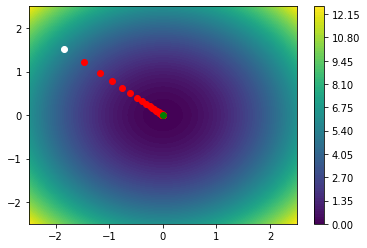

Solucion [-6.475051731439034e-49, 5.320357877439425e-49] 7.023250286884337e-97


In [ ]:
f = lambda x: x[0]**2+x[1]**2 # funcion
df = lambda x: [2*x[0], 2*x[1]] # gradiente

resolucion = 100
rango = 2.5
x = np.linspace(-rango, rango, resolucion)
y = np.linspace(-rango, rango, resolucion)
z = np.zeros((resolucion, resolucion))

for ix, valor_x in enumerate(x):
  for iy, valor_y in enumerate(y):
    z[ix, iy] = f([valor_x,valor_y])

plt.contourf(x,y,z,resolucion)
plt.colorbar()

# Generamos un punto aleatorio
p = [ random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(p[0], p[1], "o", c="white")

# tasa de aprendizaje
ta = .1

for _ in range(500):
  grad = df(p)

  p[0], p[1] = p[0] - ta*grad[0], p[1] - ta*grad[1]
  plt.plot(p[0], p[1], "o", c="red")

plt.plot(p[0], p[1], "o", c="green")
plt.show()

print("Solucion", p, f(p))